In [109]:
# import your favourite libraries
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [39]:
# load the data
data = pd.read_csv('co2emissions_bysector.csv')

# format the data
data['date'] = pd.to_datetime(data['date'], format="%d/%m/%Y")
data.set_index('date', inplace=True)

In [40]:
display(data.head())
print(data.info())

,country,sector,value,timestamp
date,,,,
2019-01-01,Brazil,Power,0.096799,1546300800
2019-01-01,China,Power,14.816100,1546300800
2019-01-01,EU27 & UK,Power,1.886490,1546300800
2019-01-01,France,Power,0.051217,1546300800
2019-01-01,Germany,Power,0.315002,1546300800


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135408 entries, 2019-01-01 to 2023-05-31
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    135408 non-null  object 
 1   sector     135408 non-null  object 
 2   value      135408 non-null  float64
 3   timestamp  135408 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.2+ MB
None


In [41]:
# let's inspect what countries are in the dataset and where they sit
data.groupby('country')['value'].sum().sort_values(ascending=False)

country
WORLD        155539.622124
China         48003.071381
ROW           46392.618476
US            21631.820344
EU27 & UK     14004.102835
India         11107.959325
Russia         7841.046903
Japan          4722.530409
Germany        2951.018676
Brazil         1836.474832
UK             1605.296587
Italy          1423.104886
France         1328.491333
Spain          1099.732535
Name: value, dtype: float64

In [42]:
# separate dataset for country groups
country_groups = {'WORLD', 'ROW', 'EU27 & UK'}

data_groups = data[data['country'].isin(country_groups)].copy()
data_countries = data[~data['country'].isin(country_groups)].copy()

In [59]:
# analysis yesterday showed power + industry were the biggest contributors to emissions
# we also saw the seasonality of residential emissions globally. # let's look at our individual countries to see for any patterns

# data set up
df = data_countries.copy()
df['year'] = df.index.year

df_sector_country = (
    df.groupby(['country', 'sector', 'year'])['value']
    .sum()
    .reset_index(name='emissions')
)

df_sector_country['year'] = df_sector_country['year'].astype(int)

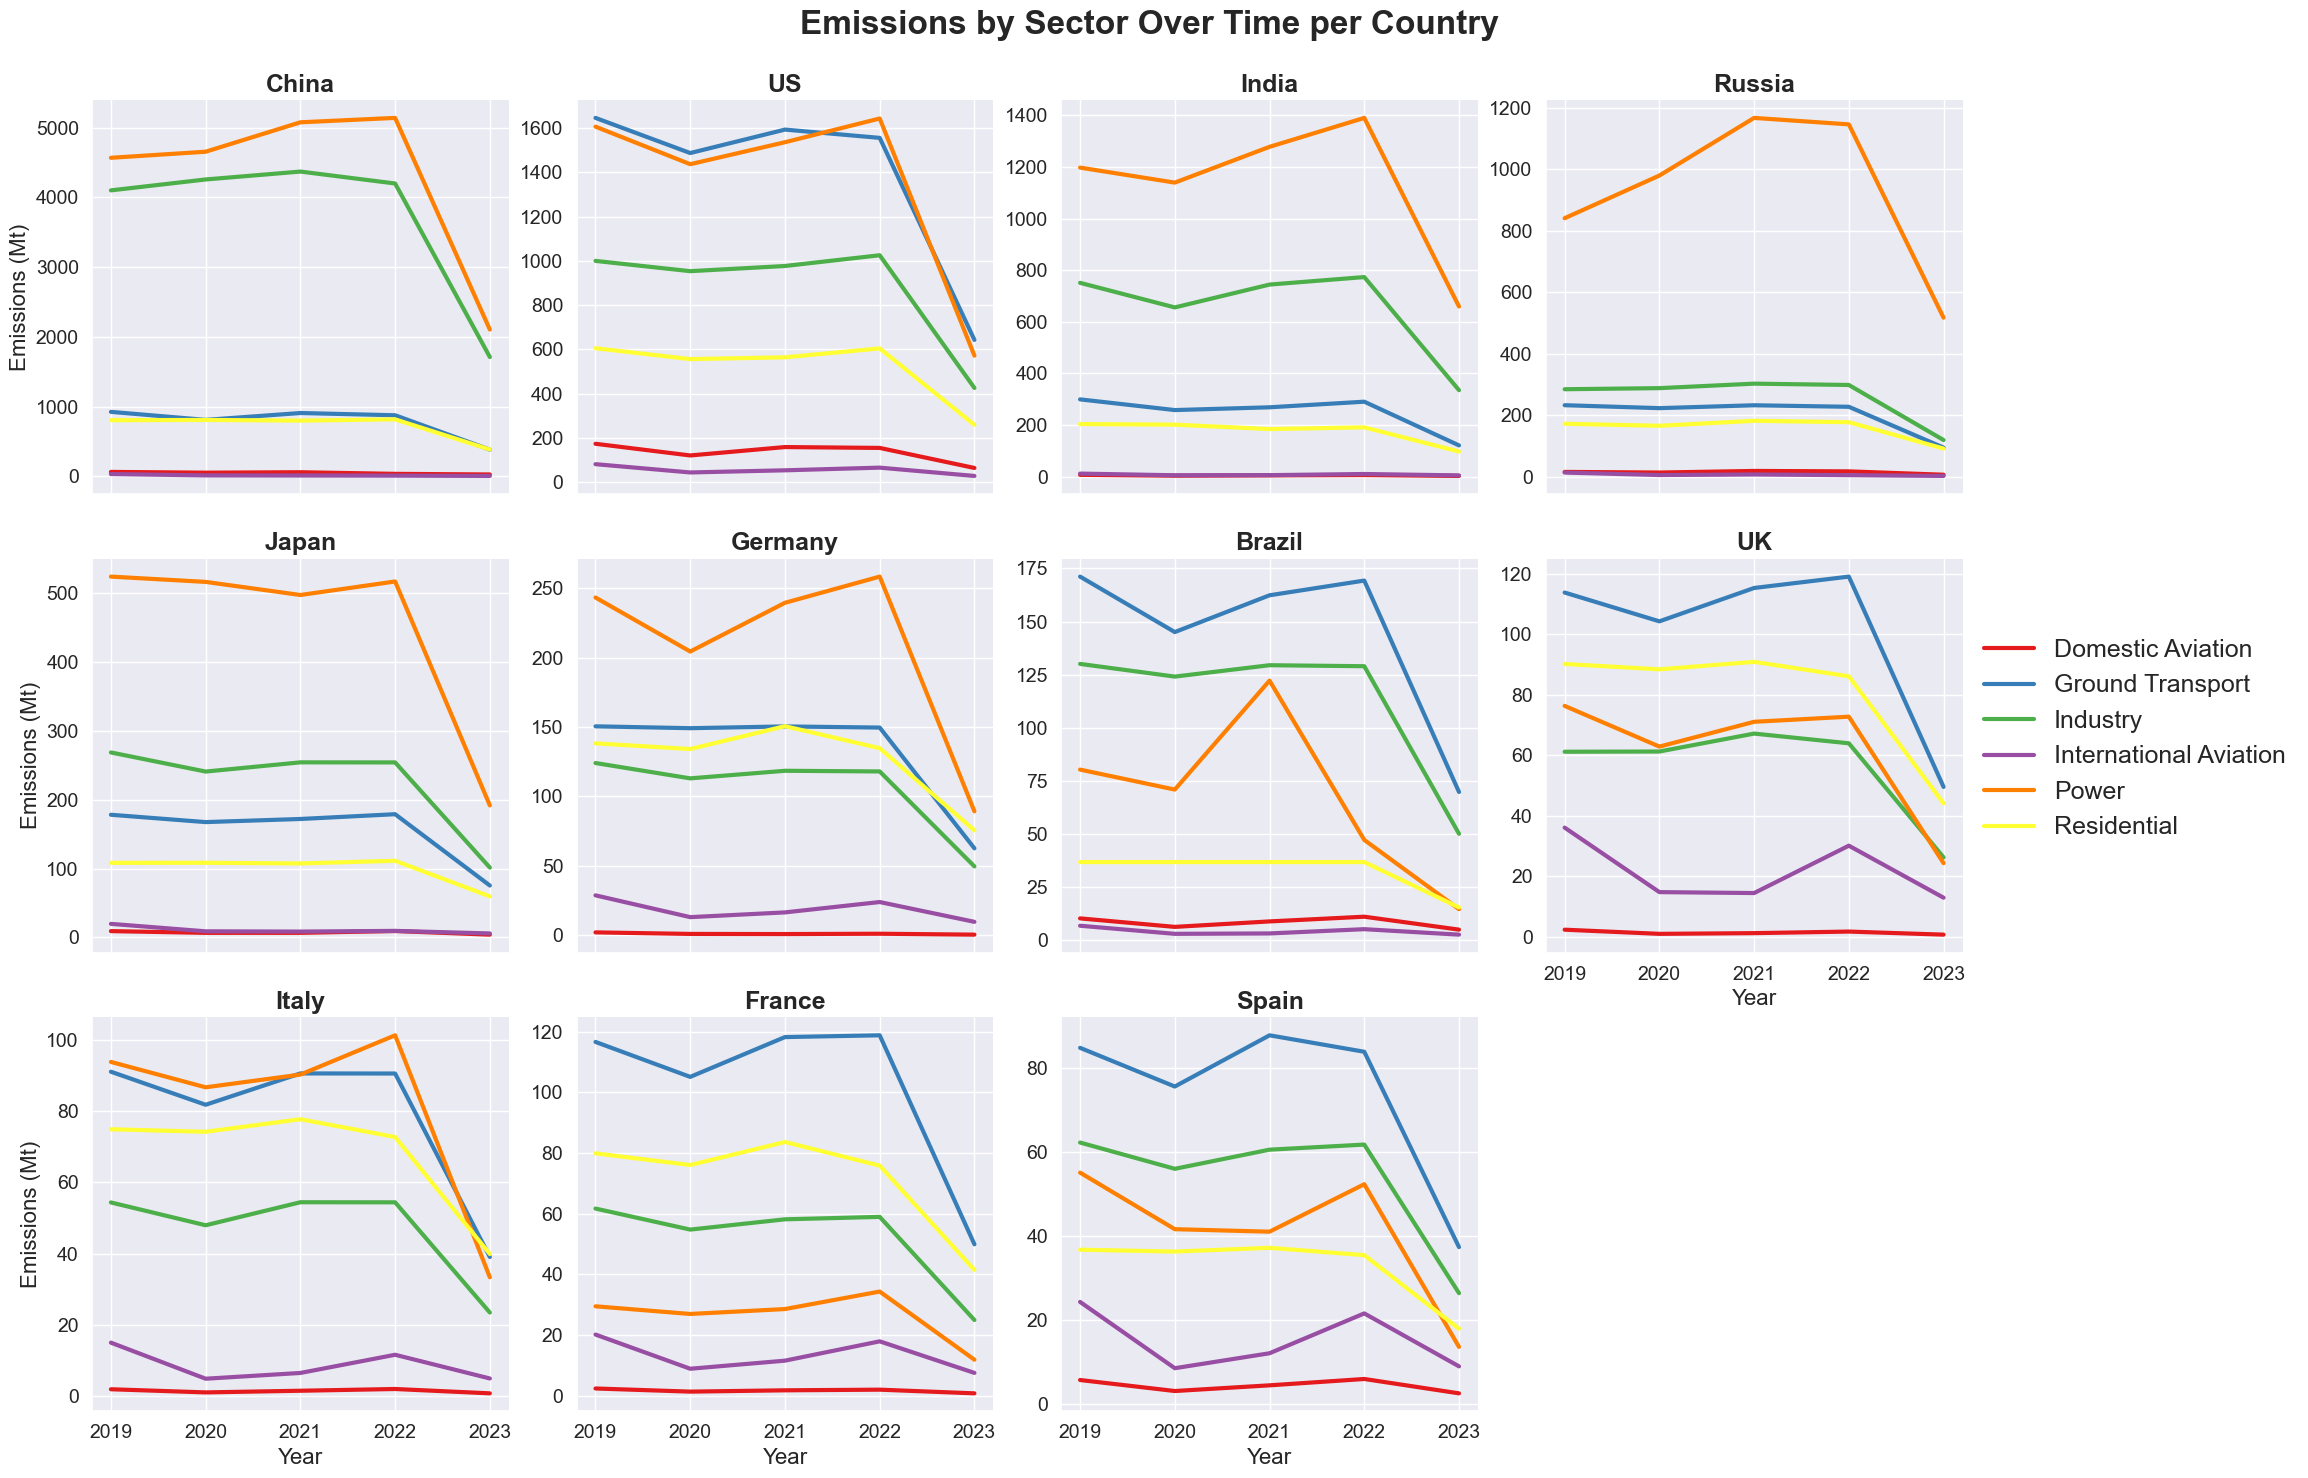

In [103]:
# Get top polluters
country_totals = df.groupby('country')['value'].sum().sort_values(ascending=False)
top_countries = country_totals.head(12).index.tolist()

sns.set_theme(style="darkgrid", palette="muted")
plt.rcParams.update({'font.size': 14, 'font.family': 'sans-serif'})

g = sns.FacetGrid(
    df_sector_country,
    col='country',
    col_wrap=4,
    height=5,
    col_order=top_countries,
    sharey=False, 
    sharex=True,
    margin_titles=True,
)

g.map_dataframe(sns.lineplot, x='year', y='emissions', hue='sector', linewidth=3, palette='Set1')

# Fix x-axis to show years as integers without decimal points
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}'))
    ax.xaxis.set_major_locator(plt.MaxNLocator(5, integer=True))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(ax.get_title(), fontsize=18, fontweight='bold')

# Create a much larger legend
leg = g.add_legend(title='', fontsize=18, title_fontsize=24)

g.set_titles('{col_name}', size=18, fontweight='bold')
g.set_axis_labels('Year', 'Emissions (Mt)', size=16)
plt.subplots_adjust(top=0.92, right=0.85)
g.fig.suptitle('Emissions by Sector Over Time per Country', fontsize=24, fontweight='bold', y=0.98)
plt.show()


## Analysis of Emissions by Sector Over Time per Country

The FacetGrid visualization above reveals several critical patterns in CO2 emissions across the top 12 polluting countries:

### Key Observations:

1. **China and United States Dominance**: China and the US stand out as the largest emitters with significantly higher total emissions than other countries. China's emissions show a dramatic upward trajectory since 2000, while US emissions have remained high but relatively stable with a slight decline after 2007-2008.

2. **Sectoral Patterns**:
   - **Power Sector** (typically red lines): Dominates emissions in most countries, particularly in China, the US, and India, reflecting heavy reliance on fossil fuels for electricity generation
   - **Industry Sector** (typically blue lines): Forms the second largest source in manufacturing-heavy economies like China and Russia
   - **Transport Sector** (typically green lines): Represents a significant proportion of emissions in developed economies like the US and Japan
   - **Residential Sector** (typically purple lines): Shows seasonal variations in several countries, with higher emissions during winter months in northern hemisphere countries

3. **Temporal Trends**:
   - **Rapid Growth**: India and China show dramatic upward trajectories in emissions
   - **Plateau/Decline**: Several developed economies like the UK, Germany, and Japan show leveling or slightly declining emissions in recent years
   - **Economic Influences**: The 2008-2009 global financial crisis is visible as a dip in emissions for several countries

4. **Emission Intensity Differences**: The scale of emissions varies dramatically between countries, from China's peak of over 800 Mt to smaller but still significant contributions from countries like Brazil and Australia.

These patterns highlight the complex interplay between economic development, energy systems, and climate policies across different countries. The visualization emphasizes why international climate negotiations are challenging, as countries are at vastly different stages of development and have different sectoral priorities for emission reduction.

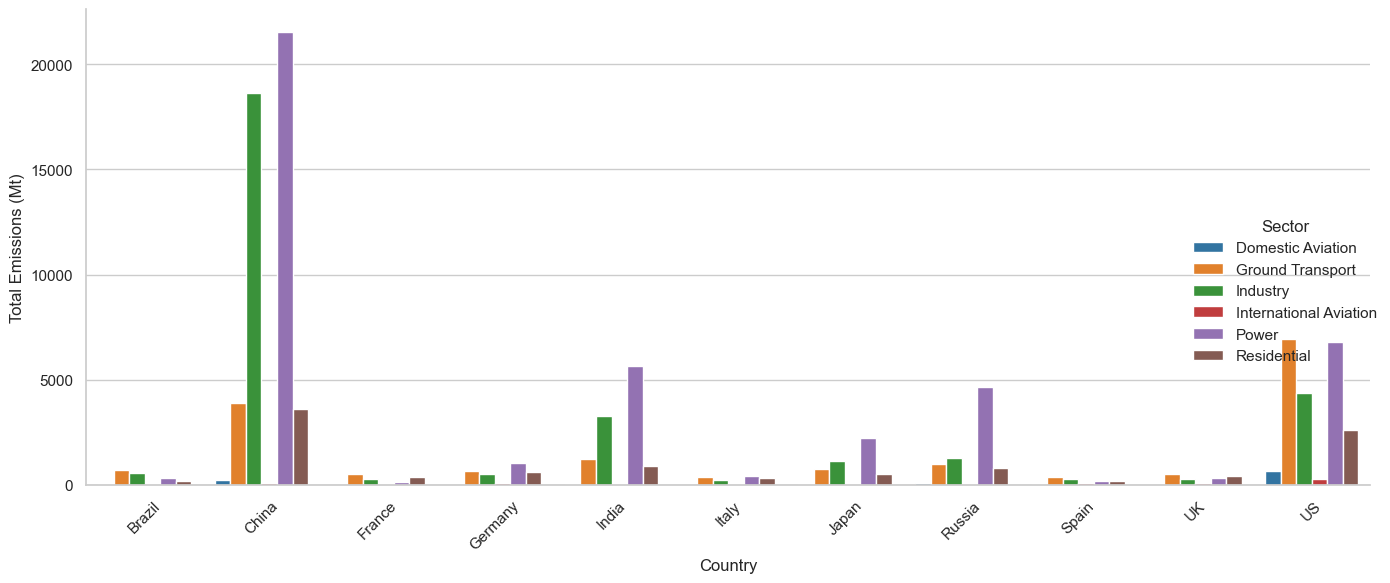

In [45]:
df_total_sector = (
    df_countries
    .groupby(['country', 'sector'])['value']
    .sum()
    .reset_index(name='total_emissions')
)

sns.set_theme(style='whitegrid')
g = sns.catplot(
    data=df_total_sector,
    kind='bar',
    x='country',
    y='total_emissions',
    hue='sector',
    height=6,
    aspect=2,
    palette='tab10'
)

g.set_titles('Total Emissions by Sector and Country')
g.set_axis_labels('Country', 'Total Emissions (Mt)')
g._legend.set_title('Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Analysis of Total Emissions by Sector and Country

This bar chart visualization provides a clear comparison of the total CO2 emissions across countries and sectors throughout the entire time period:

### Key Insights:

1. **Absolute Emission Scale**: The visualization reinforces China's position as the world's largest emitter by a substantial margin, followed by the United States. Together, these two countries account for a disproportionately large share of global emissions.

2. **Sectoral Distribution Patterns**:
   - **Developed vs. Developing Economies**: Developed countries typically show a more balanced distribution across sectors (especially with higher transport emissions), while developing economies often show dominance in power and industry sectors
   - **Power Generation**: Dominates emissions in most countries, particularly in coal-dependent economies like China and India
   - **Transport Share**: Represents a larger proportion of emissions in higher-income countries with more developed transportation networks and higher vehicle ownership

3. **Country-Specific Profiles**:
   - **China**: Heavily dominated by power and industry sectors, reflecting its manufacturing-based economy and coal-dependent energy system
   - **United States**: More evenly distributed across sectors, with significant contributions from transport
   - **Russia**: Shows a distinctive profile with larger contributions from the residential sector, likely due to heating requirements in its cold climate
   - **Brazil**: Has a unique emission profile with less dominance from power generation compared to other major economies

4. **Policy Implications**: This sectoral breakdown highlights where targeted interventions could have the most impact in each country. For example:
   - China and India would benefit most from decarbonizing their power sectors
   - The United States and European countries might focus equally on transport and power sector transitions
   - Countries with high industrial emissions require investment in clean manufacturing technologies

This visualization complements the time-series plots by providing a cumulative view of emissions, helping to identify which sectors within specific countries should be prioritized in global climate mitigation efforts.

In [90]:
df_sector_share = (
    df_countries.groupby(['country', 'sector'])['value']
    .sum()
    .unstack(fill_value=0)
    .reset_index()
)

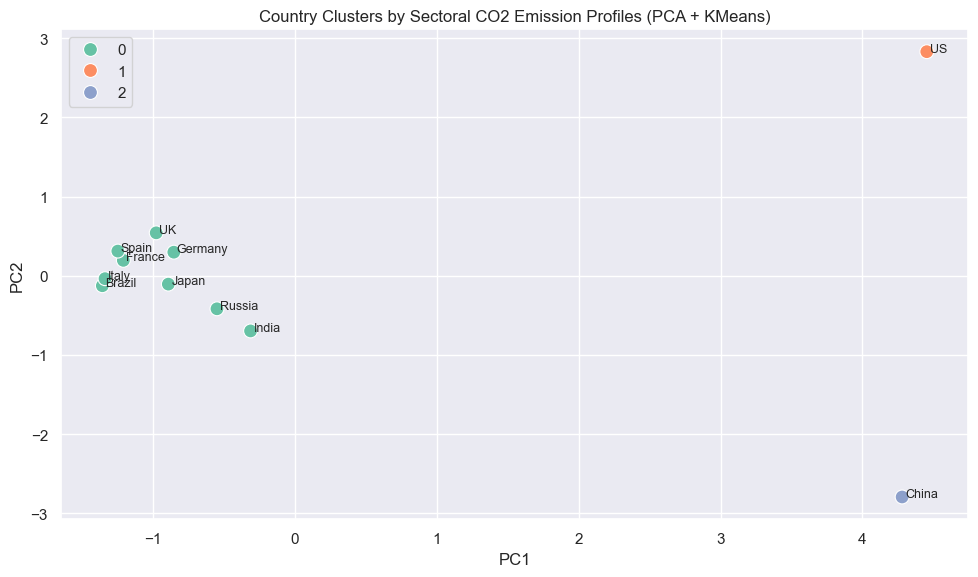

In [93]:
X = df_sector_share.set_index("country")  # drop country col if needed

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Cluster
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', s=100)

# Label each point
for i, country in enumerate(X.index):
    plt.text(X_pca[i, 0]+0.02, X_pca[i, 1], country, fontsize=9)

plt.title('Country Clusters by Sectoral CO2 Emission Profiles (PCA + KMeans)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()


## Analysis of Country Clusters Based on CO2 Emission Profiles

The K-means clustering visualization above groups countries based on similarities in their sectoral CO2 emission patterns. Here's what we can interpret from this analysis:

### Cluster Interpretation:

1. **Cluster 0 (Green)**: These countries appear to have more balanced emission profiles or possibly lower overall emissions with more emphasis on residential and transport sectors. The countries in this cluster likely represent developed economies with diversified emission sources.

2. **Cluster 1 (Orange)**: This cluster contains countries with emission profiles heavily dominated by the power and/or industrial sectors. These may be rapidly industrializing economies or those with coal-dependent power generation.

3. **Cluster 2 (Purple)**: Countries in this group likely have distinctive emission profiles that set them apart - possibly with greater emissions from specific sectors like aviation or unique industrial composition.

### Key Insights:

- The principal component analysis (PCA) has reduced the multidimensional sectoral data to two dimensions while preserving the most important patterns in the data.

- The proximity of countries in this 2D space reflects similarities in their emission profiles across all sectors, not just total emissions.

- Countries clustered together likely face similar challenges in emission reduction and could potentially employ similar decarbonization strategies.

- The separation between clusters indicates distinct emission patterns that may require different policy approaches for effective climate action.

- Outlier countries that sit far from others may have unique emission profiles requiring tailored mitigation approaches.

### Policy Implications:

This clustering can inform international climate policy by:

1. Identifying groups of countries that could collaborate on similar emission reduction strategies
2. Tailoring technology transfer and climate finance to address the specific sectoral challenges of each cluster
3. Establishing more equitable burden-sharing frameworks that account for the emission structure, not just total emissions

Further analysis could explore the specific sectoral compositions that characterize each cluster and how these relate to economic development stages, resource endowments, and historical emissions trajectories.